In [1]:
from plotnine import *
from siuba import *
import pandas as pd

tournament = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-06/tournament.csv')

## Bracket size over time

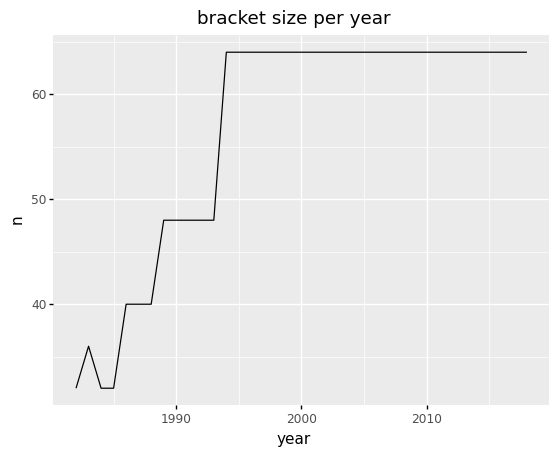

<ggplot: (8762539661499)>

In [2]:
(tournament
  >> count(_.year)
  >> ggplot(aes("year", "n"))
   + geom_line()
   + labs(title = "bracket size per year")
)

In [3]:
tourn_64 = tournament >> add_count(_.year) >> filter(_.n == 64)

# filter(add_count(tournament, _.year), _.n == 64)

## Top conferences

In [4]:
tourn_64 >> count(_.conference, sort = True) >> head()

,conference,n
0,Southeastern,167
1,Atlantic Coast,138
2,Big 12,132
3,Big Ten,127
4,Big East,125


In [5]:
tourn_64 >> count(_.tourney_finish, sort = True)

(tourn_64
  >> mutate(winner = _.tourney_finish == "Champ")
  >> group_by(_.seed, _.conference)
  >> summarize(pct_win = _.winner.mean())
)

,seed,conference,pct_win
0,1.0,American Athletic,0.600000
1,1.0,Atlantic Coast,0.050000
2,1.0,Big 12,0.100000
3,1.0,Big East,0.421053
4,1.0,Big Eight,0.000000
...,...,...,...
345,16.0,Southwestern,0.000000
346,16.0,Summit,0.000000
347,16.0,Trans America,0.000000
348,16.0,Trans-America,0.000000


## Seed and advancing

In [6]:
tournament

,year,school,seed,conference,conf_w,conf_l,conf_percent,conf_place,reg_w,reg_l,reg_percent,how_qual,x1st_game_at_home,tourney_w,tourney_l,tourney_finish,full_w,full_l,full_percent
0,1982,Arizona St.,4.0,Western Collegiate,NaN,NaN,NaN,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4
1,1982,Auburn,7.0,Southeastern,NaN,NaN,NaN,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8
2,1982,Cheyney,2.0,Independent,NaN,NaN,NaN,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3
3,1982,Clemson,5.0,Atlantic Coast,6.0,3.0,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5
4,1982,Drake,4.0,Missouri Valley,NaN,NaN,NaN,-,26,6,81.3,auto,Y,2,1,RF,28,7,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,2018,UCLA,3.0,Pac-12,14.0,4.0,77.8,3rd,24,8,75.0,at-large,Y,2,1,RF,27,8,77.1
2088,2018,UConn,1.0,American Athletic,16.0,0.0,100.0,1st,32,0,100.0,auto,Y,4,1,NSF,36,1,97.3
2089,2018,Villanova,9.0,Big East,12.0,6.0,66.7,3rd,22,8,73.3,at-large,N,1,1,2nd,23,9,71.9
2090,2018,Virginia,10.0,Atlantic Coast,10.0,6.0,62.5,6th,10,6,62.5,at-large,N,1,1,2nd,19,14,57.6


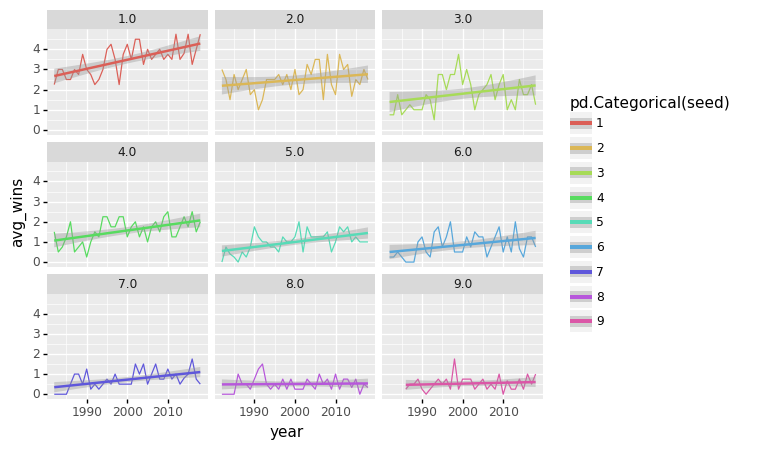

<ggplot: (8762479474460)>

In [7]:
from siuba.dply.forcats import fct_reorder

(tournament
  >> group_by(_.year, _.seed)
  >> summarize(
      n_teams = _.year.size,
      avg_wins = _.tourney_w.mean(),
      avg_seed = _.seed.mean()
  )
  >> ungroup()
  >> filter(_.seed <= 9)
  >> ggplot(aes("year", "avg_wins", color = "pd.Categorical(seed)"))
   + geom_line()
   + geom_smooth(method = "lm")
   + facet_wrap("~ seed")
)